# Задание 1
Реализовать вычисление энтропии и посчитать её значение для: 
- (0.2, 0.2, 0.2, 0.2, 0.2) 
- (0.5, 0.5) 
- (0.9, 0.05, 0.05, 0) 
- (0, 0, 0, 0, 1, 0)

Объяснить полученные результаты

In [24]:
import numpy

def entropy_calculation(list):
    H = 0
    for p in list:
        if p == 0:
            continue
        H += p * numpy.log2(p)
    if H == 0:
        return H
    else:
        return -H

In [25]:
list1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
list2 = np.array([0.5, 0.5])
list3 = np.array([0.9, 0.05, 0.05, 0])
list4 = np.array([0, 0, 0, 0, 1, 0])

In [26]:
print(entropy_calculation(list1))
print(entropy_calculation(list2))
print(entropy_calculation(list3))
print(entropy_calculation(list4))

2.321928094887362
1.0
0.5689955935892812
0.0


В первом варианте энтропия больше чем во втором, т.к. больше количество исходов.

В последнем варианте энтропия равна нулю, потому что есть всего лишь один исход с вероятностью 1.

Максимальное значение энтропии достигается, если вероятность всех исходов равна.

# Задание 2

- Напишите класс дерева, который реализует метод train, получающий на вход матрицу данных (𝑥) и целевые переменные (𝑦), на выходе функция возвращает дерево в виде словаря
- в каждом случае записывается номер признака (𝑖), порог разбиения(𝑡), значение в листовой вершине слева (𝑦𝑙) и значение в листовой вершине справа (𝑦𝑟). 
- Вместо значения в листовой вершине может содержаться следующий словарь с теми же ключами и так далее

Необходимо учесть:

- Возможность строить дерево строго определенной глубины и возможность указать максимальное количество объектов в листовой вершине.
- Пороги разбиения должны лежать строго по середине между ближайшими обектами.
- Разбиений не требуется, если в получившемся множестве находятся объекты одного класса.
- Количество различных классов объектов в целевой переменной может быть больше двух.


# Задание 3
Выполните задание 2 с помощью sklearn

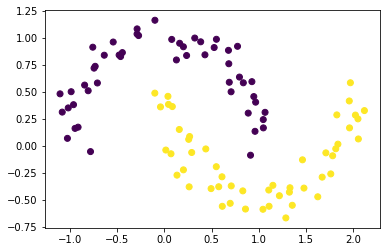

In [80]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import classification_report,  accuracy_score
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [84]:
def func(svm_poly, X, Y,  h=.002, cmap=plt.cm.coolwarm):
    
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_poly.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
    plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)

    
def accuracy_func(y_test, y_pred):
    print(classification_report(y_test, y_pred))  
    print("Accuracy:", accuracy_score(y_test, y_pred))

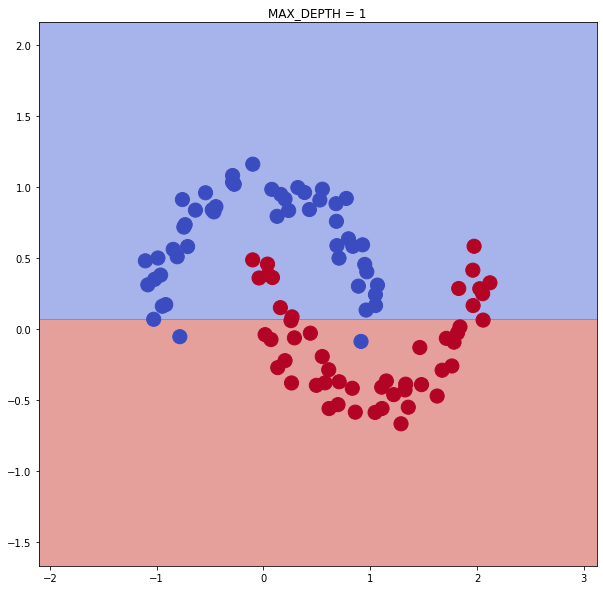

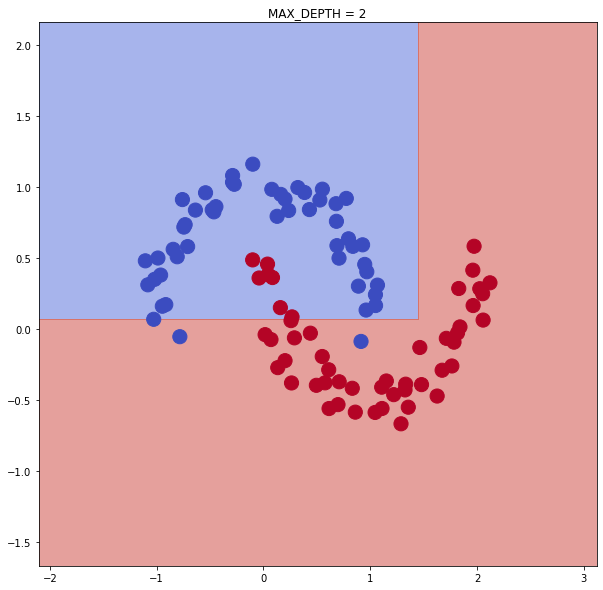

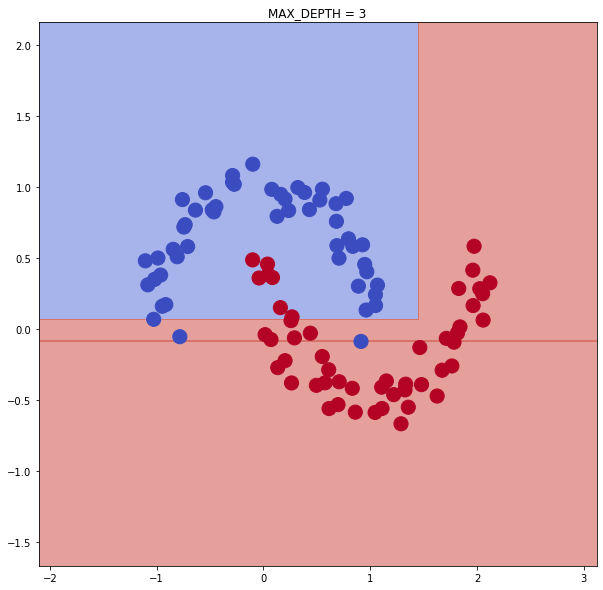

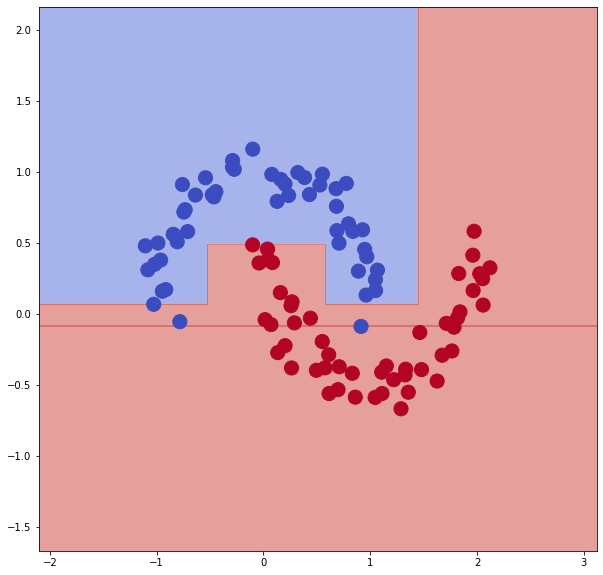

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=38)

for k in range(1, 4):
    svm_poly = DecisionTreeClassifier(max_depth=k)
    svm_poly.fit(x_train, y_train)
    func(svm_poly, x, y)
    plt.title(f'MAX_DEPTH = {k}')
    plt.show()

svm_poly = DecisionTreeClassifier()
svm_poly.fit(x_train, y_train)
func(svm_poly, x, y)
plt.show()